In [10]:
# dataset_path = 'C:\\Users\\Axel\\Programmation\\Python\\MachineLearning\\DATAS\\frais_medicaux.csv'
dataset_path = './DATAS/frais_medicaux.csv'

In [4]:
# Objectif

# Notre objectif est de prédire les frais médicaux (colonne 'charges') d'un individu selon ses caractéristiques personnelles 
# (âge, IMC, nombre d'enfants, fumeur ou pas, sexe et région)

# Nous devons :
# - Déterminer quels outils nous devrons utiliser pour atteindre notre objectif
# - Nettoyer le dataset pour le rendre exploitable (transformer les variables qualitatives en variables quantitatives)
# - Analyse la distribution de la variable 'charges' (voir cours sur la distribution normale et les conditions de tests)
# - Chercher l'existence de lien statistiques entre les différentes variables (corrélations, comparaisons de moyennes, tests de liaisons, graphiques...)
# - Evaluation de la robustesse du modèle.

In [5]:
# Déterminer quels outils utiliser

# Pour cela, faisons une analogie avec l'exemple du Boston Dataset vu en cours : 
# Notre cible était la variable MEDV (prix des maisons) qui est une variable quantitative comme 'charges' dans notre dataset sur les frais médicaux.
# Les prédicteurs sont des variables numériques continues ou discrètes, parfois encodées (comme CHAS)

# Nous sommes dans le même type de situation, 'charges' est quantitative continue, age, bmi et children sont quantitatives et smoker, sex et region 
# sont qualitatives mais facilement encodables.

# Nous pouvons donc appliquer la même méthodologie pour notre projet : la régression linéaire multiple et polynomiale !
# Pour la validation, nous pourrons utiliser RMSE et R².

# EXPLORER AUSSI LA SOLUTION DES ARBRES DE DECISION ?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
frais_medicaux=pd.read_csv(dataset_path,index_col=0,sep=',')
frais_medicaux

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
50,male,30.970,3,no,northwest,10600.54830
18,female,31.920,0,no,northeast,2205.98080
18,female,36.850,0,no,southeast,1629.83350


In [13]:
frais_medicaux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 19 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   object 
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 73.2+ KB


In [ ]:
# Analyse du dataset

# Contient des données sur les caractéristiques personnelles d'individus ainsi que leurs frais médicaux annuels
# Chaque ligne du fichier représente un individu

# Les variables :
# - age => quantitative
# - sex => qualitative
# - bmi => quantitative
# - children => quantitative
# - smoker => qualitative
# - region => qualitative
# - charges => quantitative

In [14]:
# Nettoyage du dataset
# Commençons par le plus simple, quantifier les variables qualitatives binaires (sex et smoker)
frais_medicaux['sex']=frais_medicaux['sex'].map({'male':0,'female':1})
frais_medicaux['smoker']=frais_medicaux['smoker'].map({'no':0,'yes':1})
frais_medicaux[['sex','smoker']].head()

,sex,smoker
age,,
19,1,1
18,0,0
28,0,0
33,0,0
32,0,0


In [15]:
# Pour lancer une matrice de corrélation, nous devons n'avoir dans le dataset que des variables quantitatives.
# Or, la variable 'region' nous pose problème car elle est qualitative et n'est pas facilement quantifiable.
# On va remplacer toutes les regions par un numéro.
print(frais_medicaux['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [16]:
region_numero={'southwest':0,'southeast':1,'northwest':2,'northeast':3}
# on crée une nouvelle colonne dans le dataset 'region_numeric'
frais_medicaux['region_numeric']=frais_medicaux['region'].map(region_numero)
frais_medicaux[['region','region_numeric']].head()

,region,region_numeric
age,,
19,southwest,0
18,southeast,1
28,southeast,1
33,northwest,2
32,northwest,2


In [17]:
# Maintenant, si on exclu la colonne region qui est une colonne textuelle, le dataset est complètement exploitable 
frais_medicaux.loc[:,frais_medicaux.columns!='region']

,sex,bmi,children,smoker,charges,region_numeric
age,,,,,,
19,1,27.900,0,1,16884.92400,0
18,0,33.770,1,0,1725.55230,1
28,0,33.000,3,0,4449.46200,1
33,0,22.705,0,0,21984.47061,2
32,0,28.880,0,0,3866.85520,2
...,...,...,...,...,...,...
50,0,30.970,3,0,10600.54830,2
18,1,31.920,0,0,2205.98080,3
18,1,36.850,0,0,1629.83350,1


In [18]:
frais_medicaux.loc[:,frais_medicaux.columns!='region'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 19 to 61
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1338 non-null   int64  
 1   bmi             1338 non-null   float64
 2   children        1338 non-null   int64  
 3   smoker          1338 non-null   int64  
 4   charges         1338 non-null   float64
 5   region_numeric  1338 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 73.2 KB


In [19]:
# on va lancer la matrice de corrélation
matrice_de_correlation=frais_medicaux.loc[:,frais_medicaux.columns!='region'].corr().round(2) # on arrondi car sinon c'est illisible
matrice_de_correlation

,sex,bmi,children,smoker,charges,region_numeric
sex,1.00,-0.05,-0.02,-0.08,-0.06,0.00
bmi,-0.05,1.00,0.01,0.00,0.20,-0.16
children,-0.02,0.01,1.00,0.01,0.07,-0.02
smoker,-0.08,0.00,0.01,1.00,0.79,0.00
charges,-0.06,0.20,0.07,0.79,1.00,0.01
region_numeric,0.00,-0.16,-0.02,0.00,0.01,1.00


<Axes: >

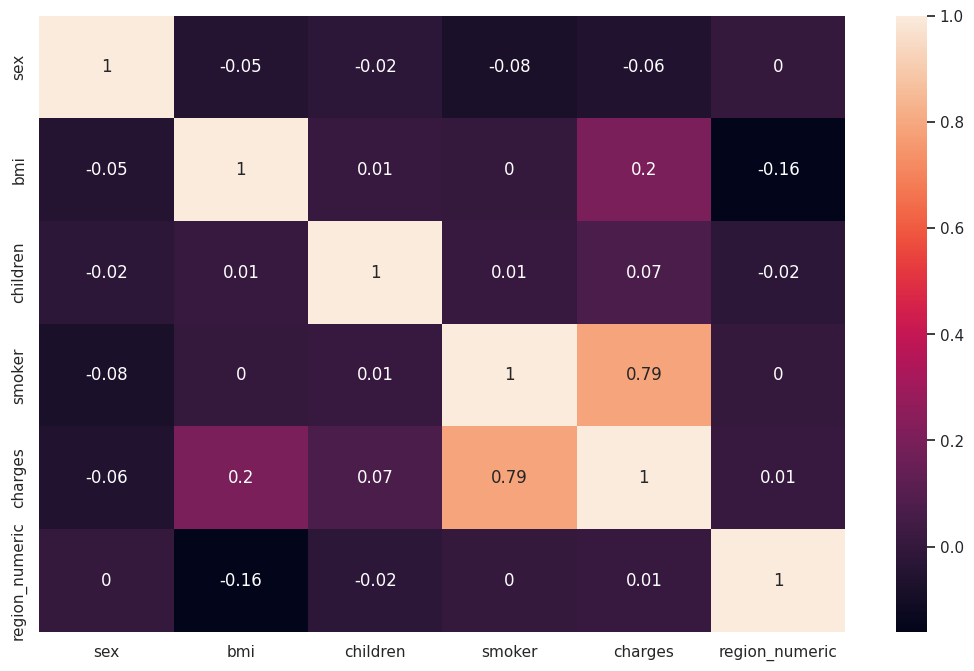

In [20]:
# pour que ce soit plus visuel
sns.set(rc={'figure.figsize':(13,8)})
sns.heatmap(data=matrice_de_correlation,annot=True)

In [ ]:
# Analyse de la matrice de corrélation

# sex : -0.06 = faible corrélation
# bmi : +0.20 = petite corrélation, on constate que plus l'IMC est élevé plus les frais médicaux ont tendance à monter.
# children : +0.07 = faible corrélation
# smoker : +0.79 = forte corrélation positive, les fumeurs ont des frais médicaux bien plus élevés, c'est la variable la plus importante
# region : +0.01 = faible corrélation, la région n'a quasiment pas d'impact.

# On constate que les deux variables les plus intéressantes de ce dataset sont bmi et smoker.

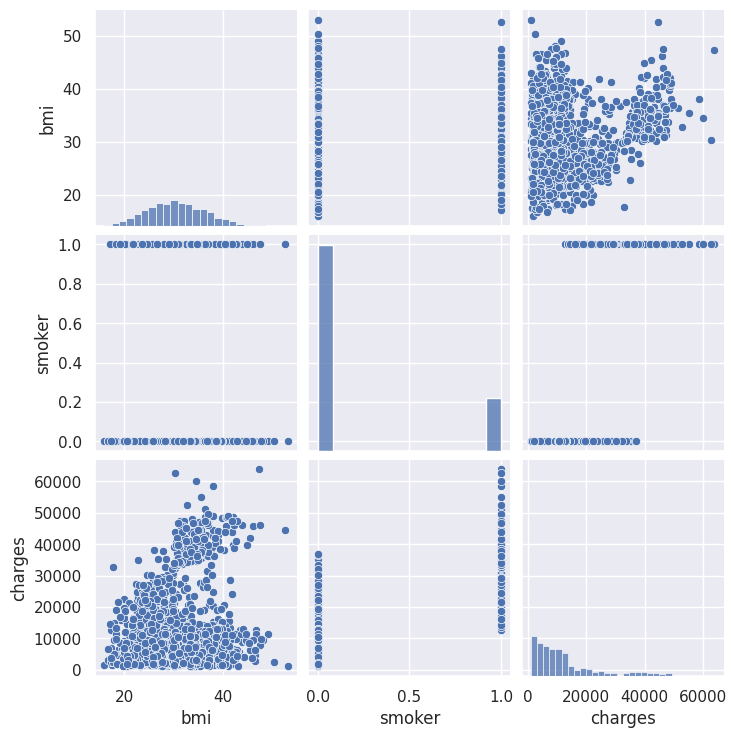

In [21]:
# Pour observer la corrélation, on peut faire un pairplot avec les deux variables à conserver
sns.pairplot(data=frais_medicaux[['bmi','smoker','charges']]);

In [ ]:
# on a des zones où les points sont groupés, et des zones vides, qui montrent un peu les tendances.
# Pour la variable smoker par exemple, nous constatons que les smokers à 1 ont des charges élevées alors 
# que les smokers à 0 ont les charges les moins élevées.
# Pour la variable bmi, c'est un peu moins flagrant car la corrélation est moins importante, mais tout de même on constate une 
# tendance à des charges plus élevées si l'IMC est plus élevé, alors qu'à l'inverse moins l'IMC est important moins les charges sont élevées.

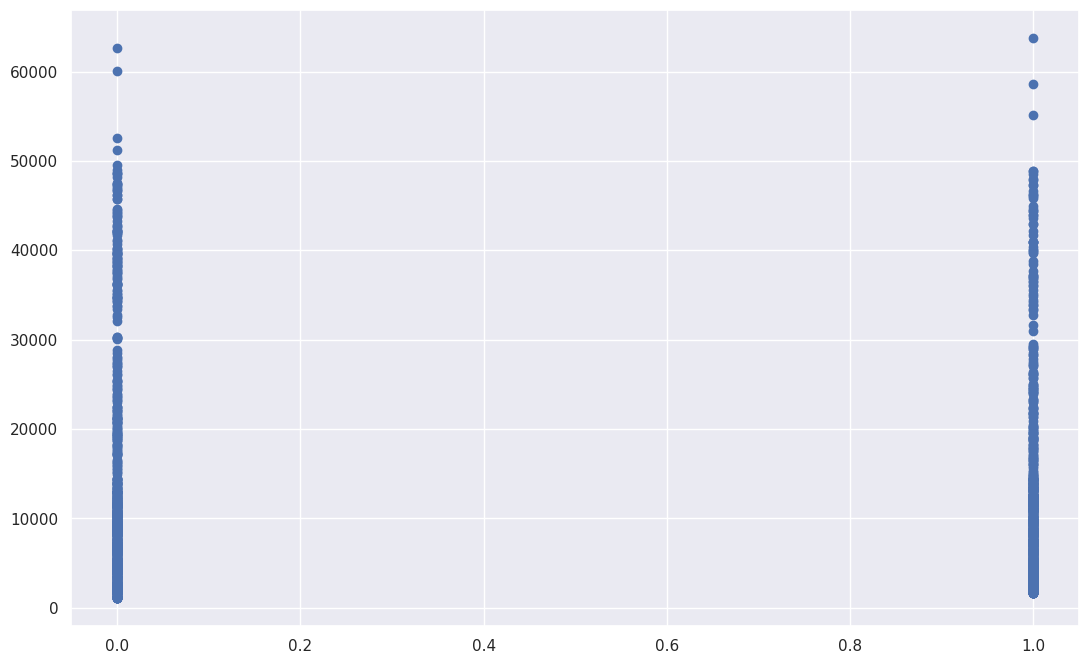

In [22]:
# Si on fait la même chose sur une variable avec une faible corrélation, nous avons un graph avec des points un peu éparpillés et
# sans groupement :
plt.scatter(frais_medicaux['sex'],frais_medicaux['charges']);

In [ ]:
# Préparation du modèle 
# On va donc prendre smoker et bmi pour évaluer charges

In [23]:
X=frais_medicaux[['bmi','smoker']]
Y=frais_medicaux['charges']

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1) # 20% de test et 80% d'apprentissage

In [29]:
X_train

,bmi,smoker
age,,
53,26.600,0
53,21.400,0
18,37.290,0
60,24.035,0
45,33.700,0
...,...,...
60,28.900,0
26,29.355,0
51,34.960,1


In [34]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df


,MSE,R2
LinearRegression,5.032085e+07,0.662911
Ridge,5.032958e+07,0.662853
Lasso,5.032128e+07,0.662908
DecisionTree,4.950170e+07,0.668398
RandomForest,4.532559e+07,0.696373


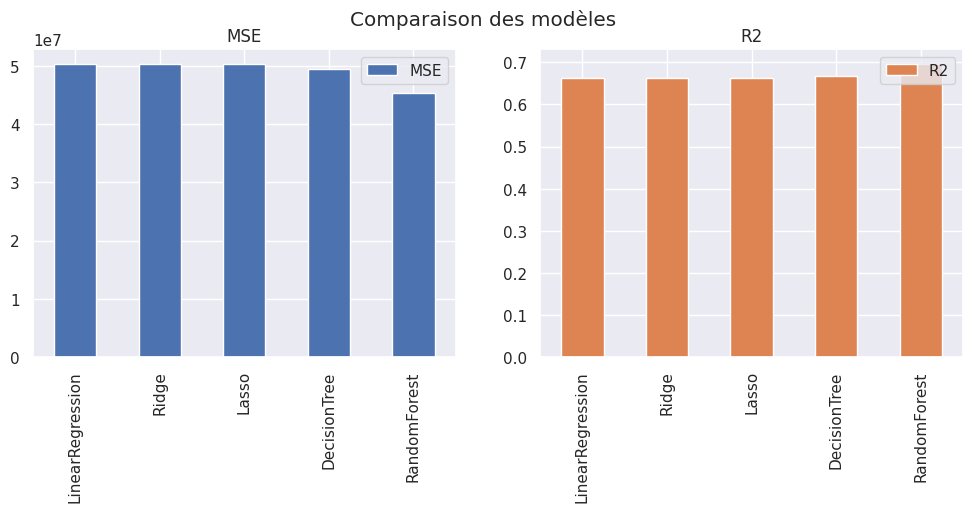

In [36]:
import matplotlib.pyplot as plt

results_df[['MSE', 'R2']].plot(kind='bar', subplots=True, layout=(1,2), figsize=(12,4))
plt.suptitle('Comparaison des modèles')
plt.show()

In [40]:
for name, model in models.items():
    scores = cross_val_score(model, X, Y, scoring='r2', cv=5)
    print(f"{name} : R2 moyen en CV = {scores.mean():.3f} (+/- {scores.std():.3f})")


LinearRegression : R2 moyen en CV = 0.656 (+/- 0.021)
Ridge : R2 moyen en CV = 0.656 (+/- 0.020)
Lasso : R2 moyen en CV = 0.656 (+/- 0.021)
DecisionTree : R2 moyen en CV = 0.607 (+/- 0.075)
RandomForest : R2 moyen en CV = 0.671 (+/- 0.051)


In [44]:
rf = RandomForestRegressor()  # ou RandomForestClassifier()
rf.fit(X_train, Y_train)


RandomForestRegressor()

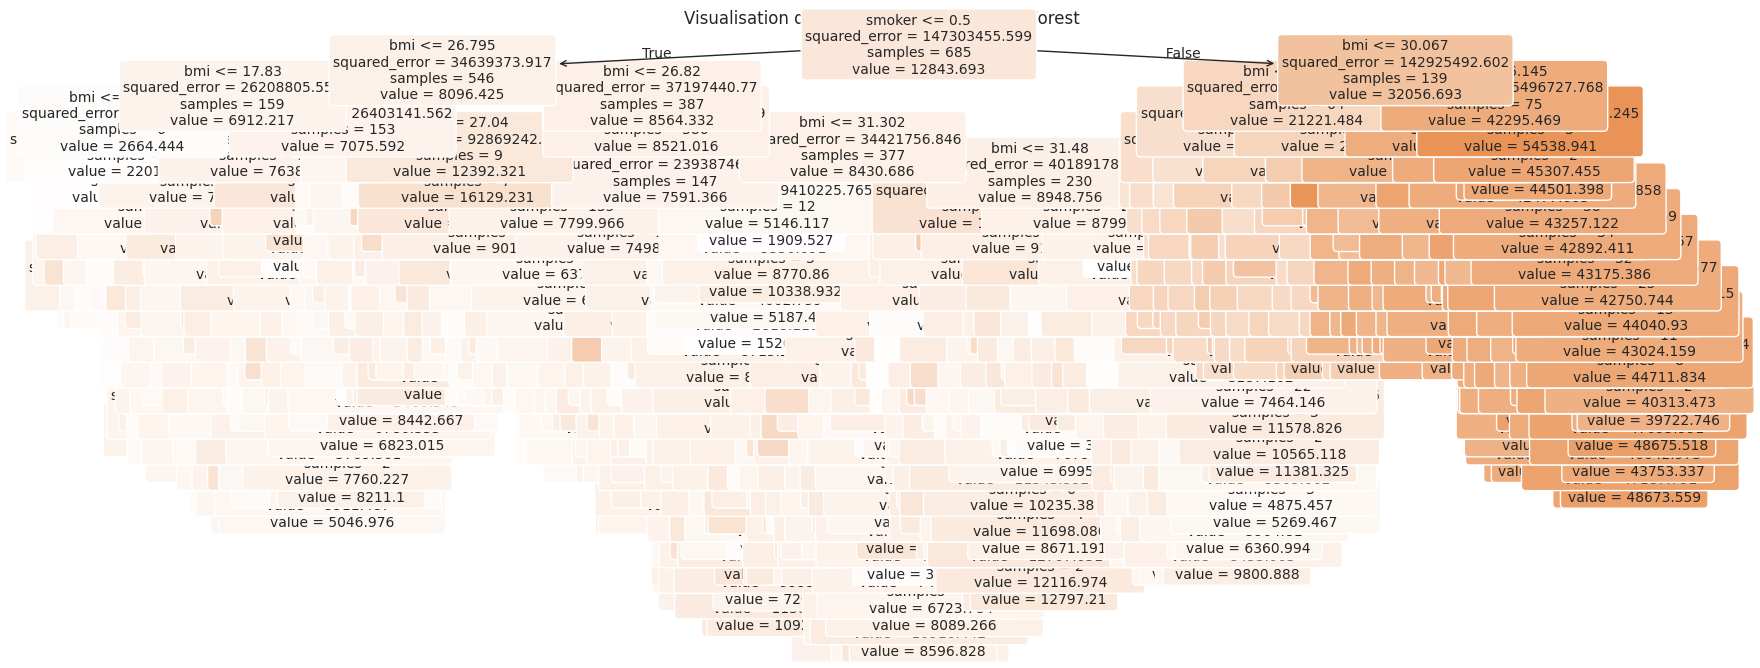

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Visualisation du premier arbre
plt.figure(figsize=(20, 8))
plot_tree(
    rf.estimators_[0],  # Pas besoin d'importer, c'est là !
    feature_names=X_train.columns, 
    filled=True, 
    rounded=True, 
    # max_depth=None, # (ou ne pas mettre l’option) : tout l’arbre, mais parfois illisible
    max_depth=3,
    fontsize=10
)
plt.title("Visualisation d'un des arbres du Random Forest")
plt.show()


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_modele=LinearRegression()
lin_modele.fit(X_train,Y_train)

LinearRegression()

In [27]:
lin_modele.intercept_

np.float64(-3032.928355758093)

In [28]:
lin_modele.coef_

array([  372.25558467, 23569.00761241])

In [ ]:
lin_modele.score(X_train,Y_train)

In [ ]:
# On a un 65% de pronostic. C'est plutôt pas mal avec simplement deux variables.
# Sur toutes les variables qu'on avait, ces deux variables nous permettent de récupérer 65 de la variabilité des frais médicaux.

In [ ]:
# On peut vérifier si on est overfité
y_test_predict=lin_modele.predict(X_test)
# On prédit les prix par le modèle, on va calculer le score entre les y test et les y test prédits
r2score=r2_score(Y_test,y_test_predict)
print('R2 SCORE TEST ==> ',r2score)

In [ ]:
# On a un pronostic de 66%, ce qui est plutôt pas mal. Ça ne veut pas dire que le modèle est vraiment meilleur, mais ça reste un bon score.

In [ ]:
# On peut maintenant passer aux tests, voir si le modèle peut être amélioré ou non
# D'abord, regardons ce que ça donne si on prend le modèle à une variable 'smoker'
# (au lieu de faire une régression multiple on fait une régression linéaire)

X=frais_medicaux[['smoker']]
Y=frais_medicaux['charges']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
print('SCORE ENTRAÎNEMENT ==> ',lin_modele.score(X_train,y_train))
y_test_predict=lin_model.predict(X_test)
r2score=r2_score(y_test,y_test_predict)
print('R2 SCORE TEST ==> ',r2score)
rmse=np.sqrt(mean_squared_error(y_test,y_test_predict))
print('RMSE TEST ==> ',rmse)

In [ ]:
# CONCLUSION : la régression multiple avec smoker et bmi est le meilleur modèle testé !

In [ ]:
#### REGRESSION POLYNOMIALE sur la régression multiple

In [ ]:
X=frais_medicaux[['bmi','smoker']]
Y=frais_medicaux['charges']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomes(degre):
    poly_features=PolynomialFeatures(degree=degre)
    # On prend les données, on va les fiter en fonction du degré donné en argument.
    X_train_poly=poly_features.fit_transform(X_train)
    # Maintenant que ça a été pré-traité, je peux lancer une régression linéaire classique !
    poly_modele=LinearRegression()
    poly_modele.fit(X_train_poly,y_train)
    X_test_poly=poly_features.fit_transform(X_test)
    y_test_predict=poly_modele.predict(X_test_poly)
    r2score=r2_score(y_test,y_test_predict)
    rmse=np.sqrt(mean_squared_error(y_test,y_test_predict))
    print('POLYNOME DE DEGRE ',degre)
    print('SCORE ENTRAÎNEMENT ==> ',poly_modele.score(X_train_poly,y_train))
    print('R2 SCORE TEST ==> ',r2score)
    print('RMSE TEST ==> ',rmse)

In [ ]:
polynomes(1)

In [ ]:
polynomes(2)

In [ ]:
# + on augmente le degré du polynome, plus on augmente la courbure : on passe à 74% avec un polynome de degré 2 

In [ ]:
# on va essayer de monter jusqu'au 10ème degré pour voir à partir de quand le modèle commence à faiblir
for i in range(1,16):
    polynomes(i)
    print() # saut de ligne
# + on courbe, + on se rapproche de tous les points donc + on se rapproche de la tendance

In [ ]:
# Analyse :
# on observe une amélioration initiale (degré 1 à degré 7)
# Le modèle gagne en qualité sur l'entraînement ET sur le test. Le R2 test monte régulièrement et le RMSE 
# diminue progressivement, ce qui montre que l'ajout de la complexité améliore la prédiction
# sans trop overfiter le début.
# On est optimal au degré 7
# => R2 TEST MAX = 0.76
# => RMSE TEST MIN => 5936.39
# Le degré 7 semble ainsi donner le meilleur compromis
# À partir du degré 8, il semblerait qu'on atteigne une situation de surapprentissage.
# on observe que les performances se stabilisent ou commencent à se déteriorer
# R2 test stagne voire régresse
# RMSE augmente
# Le score d'entraînement n'augmente plus de façon significative, on s'éloigne donc de la tendance.

In [ ]:
# CONCLUSION 
# Le meilleur modèle qu'on a pour le moment est la régression multiple polynomiale de degré 7.
# Au delà du degré 7, on voit l'overfitting. (décrochage du modèle)

In [9]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df


NameError: name 'DecisionTreeRegressor' is not defined